In [1]:
#from svae import SpikeSlabVAE, metrics, sparse_shift, sVAE
from scipy.stats import chi2_contingency
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import anndata as AnnData
import scrublet as scr
import cellrank as cr
import seaborn as sns
import scvelo as scv
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib
import networkx
import anndata
import network
import fsspec
import igraph
import scvi
import h5py
import desc 
import umap
#import svae
import os


%load_ext rpy2.ipython
%matplotlib inline 
sc.settings.verbosity = 3     
sc.set_figure_params(figsize=(2.2, 2.2))
np.random.seed(42)


Global seed set to 0
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


... reading from cache file cache/Users-brendamelano-Desktop-10xver7-OS152-OS152.h5ad


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


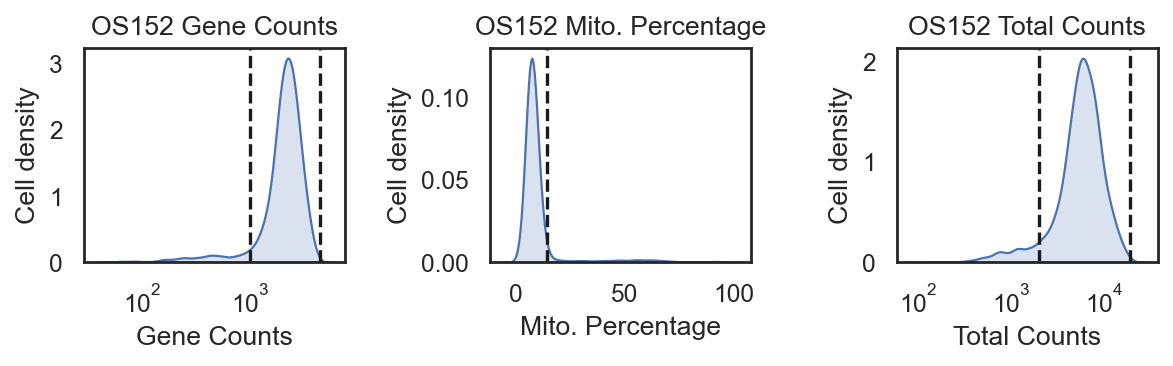

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/core/_anndata.py:610: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f"initial_size_{layer}"] = get_size(adata, layer)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


Filtered out 53542 genes that are detected 20 counts (shared).


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


Normalized count data: X, spliced, unspliced.


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html 

Extracted 1500 highly variable genes.
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
`n_top_genes` > `adata.n_var`, returning all genes.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_96172/3320855888.py:88: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Us

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    459 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    405 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['n_counts', 'pct_counts_mt', 'ccdifference']
    sparse input is densified and may lead to high memory use


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2167: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-

    finished (0:00:08)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


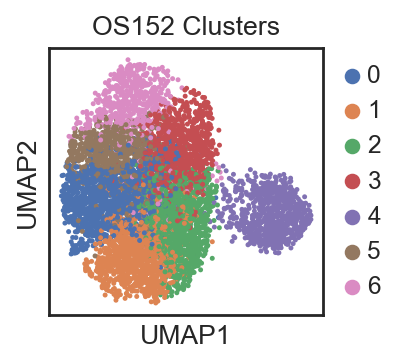

In [2]:
# Reading in loom files
adata = scv.read('/Users/brendamelano/Desktop/10xver7/OS152/OS152.loom', cache = True)


# Ensuring that all variable names are unique
adata.var_names_make_unique()


# Filtering as is done in Seurat
adata.var['mt'] = adata.var_names.str.startswith('MT-') 


# Computing mitochondrial percentage and other QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# Data for the variables
variables = [
    ('n_genes_by_counts', [(4500, '--'), (1000, '--')]),
    ('pct_counts_mt', [(14, '--')]),
    ('total_counts', [(2000, '--'), (19000, '--')])
]


# Dictionary for new titles
titles = {
    'n_genes_by_counts': 'Gene Counts',
    'pct_counts_mt': 'Mito. Percentage',
    'total_counts': 'Total Counts'
}


# Setting the theme without gridlines
sns.set_theme(style="white")


# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))


# Iterate over the variables and their respective lines to plot
for ax, (var, lines) in zip(axes, variables):
    sns.kdeplot(data=adata.obs, x=var, fill=True, alpha=0.2, ax=ax,
                log_scale=True if var != 'pct_counts_mt' else False)
    for line, style in lines:
        ax.axvline(x=line, color='k', linestyle=style)
    ax.set_title(f"OS152 {titles[var]}")  # Simpler title without extra text
    ax.set_xlabel(titles[var])  # Optionally keep the x-label as the new title
    ax.set_ylabel("Cell density")


# Adjust layout to prevent overlap
plt.tight_layout()


# Save the figure as SVG
#plt.savefig("/Users/brendamelano/Desktop/OS152_filtering_plain.svg")


# Show the plot
plt.show()


# Filtering the adata set based on total counts, genes and mitochondrial percentage
adata = adata[(adata.obs['total_counts'] >= 2000) &
                        (adata.obs['total_counts'] <= 19000) &
                        (adata.obs['n_genes_by_counts'] >= 1000) &
                        (adata.obs['n_genes_by_counts'] < 4500) & #pct_counts_mt
                        (adata.obs['pct_counts_mt'] < 14)
                        ]


# Filtering genes based on minimum counts 
scv.pp.filter_genes(adata, min_shared_counts=20)


# Normalizing the cells by all counts across all the genes
scv.pp.normalize_per_cell(adata)
#sc.pp.normalize_total(adata, target_sum=1e4)


# Filtering the dataset to only keep the most variable genes
# this is redundant to selecting highly variable genes
scv.pp.filter_genes_dispersion(adata, n_top_genes=1500)


# Log transformation
scv.pp.log1p(adata)


# Preserving the counts
adata.layers["counts"] = adata.X.copy() 


# Freezing the data in raw
# try moving to after selecting highly variable genes
adata.raw = adata


# Creating a df with the indexes (CellIDs from the adata object)
sample_one_index = pd.DataFrame(adata.obs.index)


# Selecting highly variable genes
# Research all the possible parameters for this
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000, 
    subset=True,
    layer="counts"
)


# Making a variable for the genes names
genes = adata.var.index.values


# Make sure this shouldn't come after the scale
cell_cycle_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/scvi/regev_lab_cell_cycle_genes.txt')]


# Split into s and g2m lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]


# Saving object for cell cycle genes based on those in adata
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]


# Scoring the cell cycle
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)


# Computing the ccdifference score
adata.obs['ccdifference'] = adata.obs['S_score'] - adata.obs['G2M_score']


#adata.raw = adata
adata = adata[:, adata.var.highly_variable]


# Regressing out total couts, mitochondrial percentage and ccdifference scores
sc.pp.regress_out(adata, ['n_counts', 'pct_counts_mt', 'ccdifference'])
                    
                    
# Scaling the data 
sc.pp.scale(adata, max_value=10)


# Performing principal component analysis
sc.tl.pca(adata, svd_solver='arpack')


# Identifying neighbors for umap
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)


# Performing UMAP analysis
sc.tl.umap(adata)


# Leiden cluster
sc.tl.leiden(adata, resolution = 0.8)


# Plotting the UMAP
sc.pl.umap(
    adata,
    color=["leiden"],
    frameon=True,
    title="OS152 Clusters",
    size=20,
    show=False  # Do not display the plot immediately
)


# Save the plot as an SVG file
plt.savefig("/Users/brendamelano/Desktop/OS152_clusters.svg", format='svg')
plt.show()  # Show the plot if needed

# Reading in the state labeled adata object

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


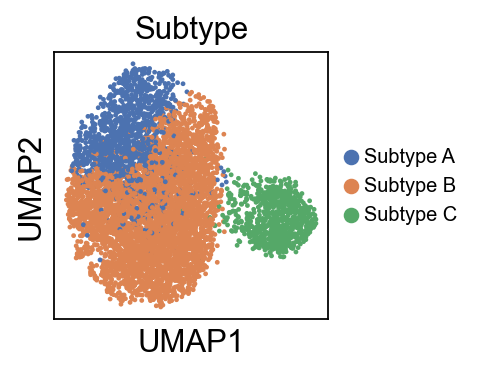

In [2]:
# Reading in the adata file from the subtype data
adata = scv.read("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_adata_subtype_PCA.h5ad")


# Plotting based on umap
sc.pl.umap(adata, color=['Subtype'], legend_fontsize=9)


# DGEA for leiden cluster

In [ ]:
# Performing DGEA between clusters
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# Creating a df for the cluster specific markers
cluster_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(60)


# Subtype A module identification

In [ ]:
# Try to set this equal to the column that contains COL1A1 to automate it
cluster_id = '6'  # Adjust based on your cluster of interest

genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'][cluster_id]).head(60)
p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'][cluster_id]).head(60)
adjusted_p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'][cluster_id]).head(60)
log_fold_changes = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'][cluster_id]).head(60)
scores = pd.DataFrame(adata.uns['rank_genes_groups']['scores'][cluster_id]).head(60)

# Combine into a single DataFrame
cluster_markers = pd.DataFrame({
    'genes': genes.values.flatten(),  # Ensure it's a 1D array
    'p_values': p_values.values.flatten(),
    'adjusted_p_values': adjusted_p_values.values.flatten(),
    'log_fold_changes': log_fold_changes.values.flatten(),
    'scores': scores.values.flatten()
})


# Sort the DataFrame by log_fold_changes in descending order
OS152_subtype_A_markers = cluster_markers.sort_values(by='log_fold_changes', ascending=False)


In [15]:
# Write the array to a CSV file
#np.savetxt("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_A_markers.csv", OS152_subtype_A_markers, delimiter=",", fmt='%s')

OS152_subtype_A_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_A_markers.csv', header=None)

OS152_subtype_A_markers = OS152_subtype_A_markers.to_numpy()

OS742_subtype_A_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS742_subtype_A_markers.csv', header=None)


OS742_subtype_A_markers = OS742_subtype_A_markers.to_numpy()

OS384_subtype_A_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS384_subtype_A_markers.csv', header=None)


OS384_subtype_A_markers = OS384_subtype_A_markers.to_numpy()

# Convert numpy arrays of arrays into sets of tuples
set1 = set(tuple(map(tuple, OS384_subtype_A_markers)))
set2 = set(tuple(map(tuple, OS742_subtype_A_markers)))
set3 = set(tuple(map(tuple, OS152_subtype_A_markers)))

# Find common genes that appear in two or more lists
common_genes = (set1 & set2) | (set2 & set3) | (set1 & set3)

# Convert the set of tuples back to a list of lists (if necessary)
common_genes_list = [list(gene) for gene in common_genes]

common_genes_list

common_genes_array = np.array(common_genes_list).flatten()

# Convert the numpy array to a pandas DataFrame
common_genes_df = pd.DataFrame(common_genes_array, columns=['Gene'])

# Save the DataFrame to a CSV file
#common_genes_df.to_csv('/Users/brendamelano/Desktop/gmt_files/Subtype_A_module.csv', index=False)

# Subtype B module identification

In [34]:
# Cluster IDs of interest
cluster_ids = [ '1','2']  # Adjust based on your clusters of interest

# Initialize empty lists to store data
genes_list = []
p_values_list = []
adjusted_p_values_list = []
log_fold_changes_list = []
scores_list = []

# Loop through each cluster to extract data
for cluster_id in cluster_ids:
    genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'][cluster_id]).head(60)
    p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'][cluster_id]).head(60)
    adjusted_p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'][cluster_id]).head(60)
    log_fold_changes = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'][cluster_id]).head(60)
    scores = pd.DataFrame(adata.uns['rank_genes_groups']['scores'][cluster_id]).head(60)
    
    # Append the extracted data for this cluster to the lists
    genes_list.append(genes)
    p_values_list.append(p_values)
    adjusted_p_values_list.append(adjusted_p_values)
    log_fold_changes_list.append(log_fold_changes)
    scores_list.append(scores)

# Concatenate data from all clusters of interest
cluster_markers = pd.concat([
    pd.DataFrame({
        'cluster_id': cluster_id,
        'genes': genes.values.flatten(),
        'p_values': p_values.values.flatten(),
        'adjusted_p_values': adjusted_p_values.values.flatten(),
        'log_fold_changes': log_fold_changes.values.flatten(),
        'scores': scores.values.flatten()
    }) for cluster_id, genes, p_values, adjusted_p_values, log_fold_changes, scores in zip(cluster_ids, genes_list, p_values_list, adjusted_p_values_list, log_fold_changes_list, scores_list)
], ignore_index=True)


# Sort the DataFrame by log_fold_changes in descending order
OS152_subtype_B_markers = cluster_markers.sort_values(by='log_fold_changes', ascending=False)

OS152_subtype_B_markers

OS152_subtype_B_markers = OS152_subtype_B_markers.iloc[:, 1].tolist()

OS152_subtype_B_markers

# Write the array to a CSV file
#np.savetxt("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_B_markers.csv", OS152_subtype_B_markers, delimiter=",", fmt='%s')

OS152_subtype_B_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_B_markers.csv', header=None)

OS152_subtype_B_markers = OS152_subtype_B_markers.to_numpy()

OS384_subtype_B_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS384_subtype_B_markers.csv', header=None)

OS384_subtype_B_markers = OS384_subtype_B_markers.to_numpy()


OS742_subtype_B_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS742_subtype_B_markers.csv', header=None)

OS742_subtype_B_markers = OS742_subtype_B_markers.to_numpy()

# Convert numpy arrays of arrays into sets of tuples
set1 = set(tuple(map(tuple, OS384_subtype_B_markers)))
set2 = set(tuple(map(tuple, OS742_subtype_B_markers)))
set3 = set(tuple(map(tuple, OS152_subtype_B_markers)))

# Find common genes that appear in two or more lists
common_genes = (set1 & set2) | (set2 & set3) | (set1 & set3)

# Convert the set of tuples back to a list of lists (if necessary)
common_genes_list = [list(gene) for gene in common_genes]

common_genes_list

common_genes_array = np.array(common_genes_list).flatten()

# Convert the numpy array to a pandas DataFrame
common_genes_df = pd.DataFrame(common_genes_array, columns=['Gene'])

# Save the DataFrame to a CSV file
#common_genes_df.to_csv('/Users/brendamelano/Desktop/gmt_files/Subtype_B_module.csv', index=False)


# Subtype C module identification

In [4]:
# Cluster IDs of interest
cluster_ids = [ '4']  # Adjust based on your clusters of interest


# Initialize empty lists to store data
genes_list = []
p_values_list = []
adjusted_p_values_list = []
log_fold_changes_list = []
scores_list = []

# Loop through each cluster to extract data
for cluster_id in cluster_ids:
    genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'][cluster_id]).head(60)
    p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'][cluster_id]).head(60)
    adjusted_p_values = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'][cluster_id]).head(60)
    log_fold_changes = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'][cluster_id]).head(60)
    scores = pd.DataFrame(adata.uns['rank_genes_groups']['scores'][cluster_id]).head(60)
    
    # Append the extracted data for this cluster to the lists
    genes_list.append(genes)
    p_values_list.append(p_values)
    adjusted_p_values_list.append(adjusted_p_values)
    log_fold_changes_list.append(log_fold_changes)
    scores_list.append(scores)

# Concatenate data from all clusters of interest
cluster_markers = pd.concat([
    pd.DataFrame({
        'cluster_id': cluster_id,
        'genes': genes.values.flatten(),
        'p_values': p_values.values.flatten(),
        'adjusted_p_values': adjusted_p_values.values.flatten(),
        'log_fold_changes': log_fold_changes.values.flatten(),
        'scores': scores.values.flatten()
    }) for cluster_id, genes, p_values, adjusted_p_values, log_fold_changes, scores in zip(cluster_ids, genes_list, p_values_list, adjusted_p_values_list, log_fold_changes_list, scores_list)
], ignore_index=True)


# Sort the DataFrame by log_fold_changes in descending order
OS152_subtype_C_markers = cluster_markers.sort_values(by='log_fold_changes', ascending=False)

OS152_subtype_C_markers = OS152_subtype_C_markers.iloc[:, 1].tolist()


# Write the array to a CSV file
np.savetxt("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_C_markers.csv", 
           OS152_subtype_C_markers, 
           delimiter=",", fmt='%s')

OS152_subtype_C_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152_subtype_C_markers.csv', header=None)

OS152_subtype_C_markers = OS152_subtype_C_markers.to_numpy()

OS384_subtype_C_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS384_subtype_C_markers.csv', header=None)


OS384_subtype_C_markers = OS384_subtype_C_markers.to_numpy()

OS742_subtype_C_markers = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS742_subtype_C_markers.csv', header=None)

OS742_subtype_C_markers = OS742_subtype_C_markers.to_numpy()


# Convert numpy arrays of arrays into sets of tuples
set1 = set(tuple(map(tuple, OS384_subtype_C_markers)))
set2 = set(tuple(map(tuple, OS742_subtype_C_markers)))
set3 = set(tuple(map(tuple, OS152_subtype_C_markers)))

# Find common genes that appear in two or more lists
common_genes = (set1 & set2) | (set2 & set3) | (set1 & set3)

# Convert the set of tuples back to a list of lists (if necessary)
common_genes_list = [list(gene) for gene in common_genes]

common_genes_list

common_genes_array = np.array(common_genes_list).flatten()

# Convert the numpy array to a pandas DataFrame
common_genes_df = pd.DataFrame(common_genes_array, columns=['Gene'])

# Save the DataFrame to a CSV file
#common_genes_df.to_csv('/Users/brendamelano/Desktop/gmt_files/Subtype_C_module.csv', index=False)

['BASP1',
 'DCN',
 'ZNF704',
 'HEY1',
 'PLAAT3',
 'MXRA8',
 'S100A4',
 'LUM',
 'PEX2',
 'TMEM70',
 'ZFHX4',
 'GNG4',
 'TERF1',
 'EPHX1',
 'KRT18',
 'ELOC',
 'XPR1',
 'RPL7',
 'FABP5',
 'CHMP4C',
 'SHOX2',
 'CHRM3',
 'PRRX1',
 'RDH10',
 'MLLT11',
 'RALGPS2',
 'LY6K',
 'MINDY2',
 'CLEC11A',
 'MME',
 'TIMP1',
 'KIFAP3',
 'CBR3',
 'TUBA1A',
 'FSCN1',
 'CKB',
 'IFITM5',
 'MAP1B',
 'CD24',
 'ATP2B1',
 'SQSTM1',
 'ENAH',
 'NPTX2',
 'MARCKSL1',
 'BTG1',
 'PCOLCE',
 'MIA3',
 'LMNA',
 'SNRNP200',
 'NEAT1',
 'SPARC',
 'CRYAB',
 'HSP90B1',
 'ANP32E',
 'TTC3',
 'S100A10',
 'HNRNPU',
 'NUCKS1',
 'FDPS',
 'RPL13A']

# Subtype module enrichment

computing score 'State_A_score'
    finished: added
    'State_A_score', score of gene set (adata.obs).
    108 total control genes are used. (0:00:00)
computing score 'Subtype_B_score'
    finished: added
    'Subtype_B_score', score of gene set (adata.obs).
    230 total control genes are used. (0:00:00)
computing score 'Subtype_C_score'
    finished: added
    'Subtype_C_score', score of gene set (adata.obs).
    306 total control genes are used. (0:00:00)


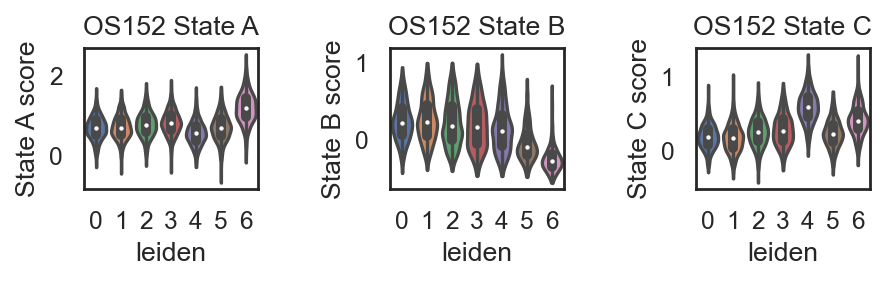

In [3]:
# Reading in gene lists for GSEA
Subtype_A_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_A_module.csv')]
Subtype_B_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_B_module.csv')]
Subtype_C_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_C_module.csv')]


# Keeping only genes that appear in the adata
Subtype_A_genes = [x for x in Subtype_A_genes if x in adata.var_names]
Subtype_B_genes = [x for x in Subtype_B_genes if x in adata.var_names]
Subtype_C_genes = [x for x in Subtype_C_genes if x in adata.var_names]


# Computing GSEA scores
sc.tl.score_genes(adata, Subtype_A_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='State_A_score', random_state=0, copy=False, use_raw=None)
sc.tl.score_genes(adata, Subtype_B_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_B_score', random_state=0, copy=False, use_raw=None)
sc.tl.score_genes(adata, Subtype_C_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_C_score', random_state=0, copy=False, use_raw=None)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(5.7, 1.9))

sc.pl.violin(adata, ['State_A_score'], groupby='leiden', stripplot=False, inner='box', 
             ylabel='State A score', ax=axs[0], show=False)
axs[0].set_title('OS152 State A')

sc.pl.violin(adata, ['Subtype_B_score'], groupby='leiden', stripplot=False, inner='box', 
             ylabel='State B score', ax=axs[1], show=False)
axs[1].set_title('OS152 State B')

sc.pl.violin(adata, ['Subtype_C_score'], groupby='leiden', stripplot=False, inner='box', 
             ylabel='State C score', ax=axs[2], show=False)
axs[2].set_title('OS152 State C')

plt.tight_layout()


# Saving the figure onto the desktop
plt.savefig('/Users/brendamelano/Desktop/OS152_gsea_scores.svg', format='svg')
plt.show()

# Plotting markers by subtype

/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_93717/782052784.py:33: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_subset.var['subtype_order'] = adata_subset.var['subtype'].map({'A': 1, 'B': 2, 'C': 3, 'Unknown': 4})
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


<Figure size 240x80 with 0 Axes>

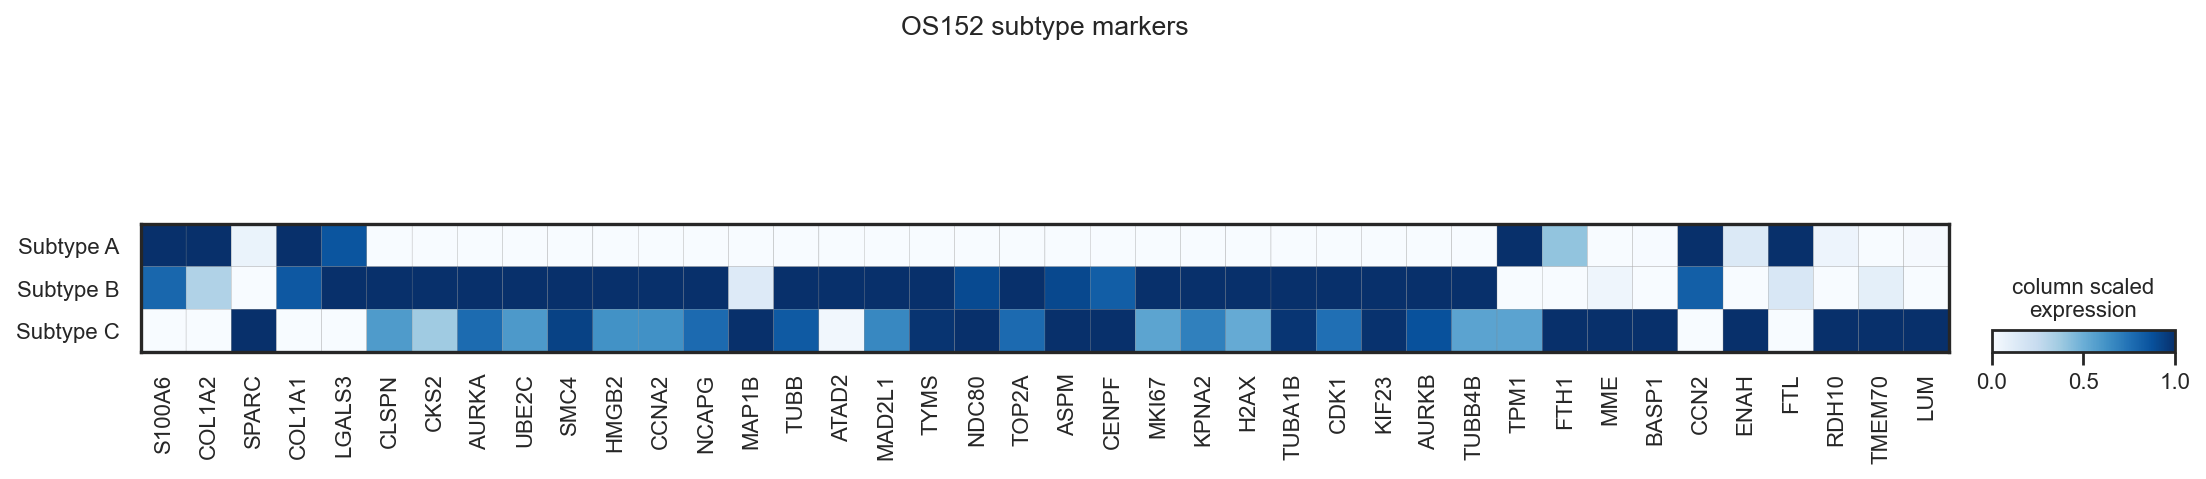

In [8]:
# Read gene lists for each subtype from the CSV files
def read_genes(file_path):
    with open(file_path, 'r') as file:
        genes = [x.strip() for x in file]
    return genes


Subtype_A_genes = read_genes('/Users/brendamelano/Desktop/gmt_files/Subtype_A_module.csv')
Subtype_B_genes = read_genes('/Users/brendamelano/Desktop/gmt_files/Subtype_B_module.csv')
Subtype_C_genes = read_genes('/Users/brendamelano/Desktop/gmt_files/Subtype_C_module.csv')


# Combine gene lists from all subtypes, ensuring uniqueness if necessary
combined_genes = list(set(Subtype_A_genes + Subtype_B_genes + Subtype_C_genes))


# Keeping only genes that appear in the adata object
combined_genes = [gene for gene in combined_genes if gene in adata.var_names]


# Ensure the combined_genes are in your expression data
adata_subset = adata[:, adata.var_names.isin(combined_genes)]


# Create the subtype dictionary 
subtype_A_dict = {gene: 'A' for gene in Subtype_A_genes}
subtype_B_dict = {gene: 'B' for gene in Subtype_B_genes}
subtype_C_dict = {gene: 'C' for gene in Subtype_C_genes}
subtype_dict = {**subtype_A_dict, **subtype_B_dict, **subtype_C_dict}


# Annotate the genes in adata with their subtype
adata.var['subtype'] = [subtype_dict.get(gene, 'Unknown') for gene in adata.var_names]


# Sort the genes in your subset by subtype
adata_subset = adata[:, adata.var_names.isin(combined_genes)]
adata_subset.var['subtype_order'] = adata_subset.var['subtype'].map({'A': 1, 'B': 2, 'C': 3, 'Unknown': 4})
adata_subset = adata_subset[:, adata_subset.var['subtype_order'].argsort()]

# Create a list of genes sorted by subtype for use in the matrixplot
sorted_genes_by_subtype = adata_subset.var_names.tolist()


# Create a figure explicitly
plt.figure(figsize=(3,1))  


# Plotting with Scanpy on the created figure
ax = sc.pl.matrixplot(
    adata_subset,
    var_names=sorted_genes_by_subtype,  # Use the sorted list of genes
    groupby='Subtype',
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    title="OS152 subtype markers",
    show=False  # Do not display the plot immediately
)


# Save the figure using matplotlib's savefig with explicit format setting
plt.savefig("/Users/brendamelano/Desktop/OS152_subtype_markers.svg", format='svg')

plt.show()

plt.close()  # Close the plot to free up memory

# Pathway enrichment analysis

computing score 'IL2_genes_score'
    finished: added
    'IL2_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'MTOR_genes_score'
    finished: added
    'MTOR_genes_score', score of gene set (adata.obs).
    198 total control genes are used. (0:00:00)
computing score 'FOCAL_ADHESION_PI3KAKTMTOR_genes_score'
    finished: added
    'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    189 total control genes are used. (0:00:00)
computing score 'PDGF_ERK1_DOWN_genes_score'
    finished: added
    'PDGF_ERK1_DOWN_genes_score', score of gene set (adata.obs).
    198 total control genes are used. (0:00:00)
computing score 'TNFA_genes_score'


    finished: added
    'TNFA_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'GCNP_genes_score'
    finished: added
    'GCNP_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'CSR_genes_score'
    finished: added
    'CSR_genes_score', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score 'ESC_genes_score'
    finished: added
    'ESC_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'PI3KAKTMTOR_genes_score'
    finished: added
    'PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    149 total control genes are used. (0:00:00)
computing score 'STK33_genes_score'
    finished: added
    'STK33_genes_score', score of gene set (adata.obs).
    193 total control genes are used. (0:00:00)
computing score 'VEGFA_genes_score'


    finished: added
    'VEGFA_genes_score', score of gene set (adata.obs).
    192 total control genes are used. (0:00:00)
computing score 'KRAS_genes_score'
    finished: added
    'KRAS_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'TGFB_genes_score'
    finished: added
    'TGFB_genes_score', score of gene set (adata.obs).
    149 total control genes are used. (0:00:00)
computing score 'EMT_genes_score'
    finished: added
    'EMT_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'EZH2_genes_score'
    finished: added
    'EZH2_genes_score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)
computing score 'LEF1_genes_score'
    finished: added
    'LEF1_genes_score', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)


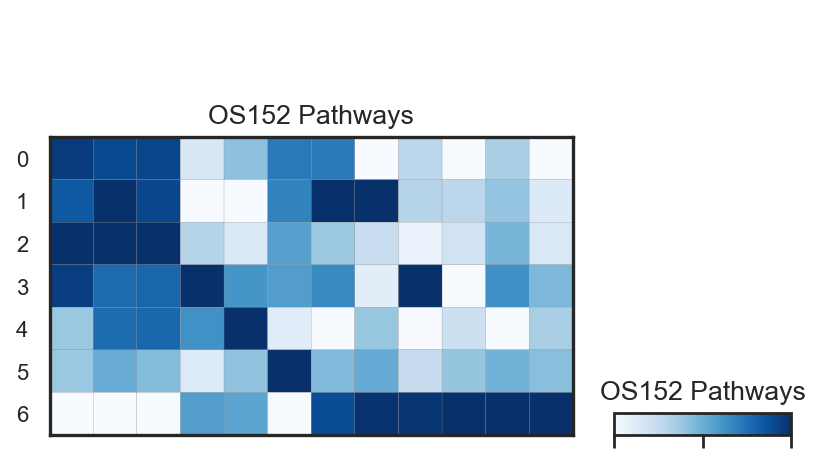

In [6]:
# Define the directory for the gmt files
directory = '/Users/brendamelano/Desktop/gmt_files'


# Create a dictionary to store gene lists
gene_lists = {}


# Create variables for gene lists
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        variable_name = os.path.splitext(filename)[0].upper()
        variable_name += "_genes"
        with open(os.path.join(directory, filename)) as f:
            gene_lists[variable_name] = [line.strip() for line in f]

            
# Create a dictionary to store gene scores for each module
gene_scores = {}

# Quantify enrichment for each gene list
for gene_list_name, gene_list in gene_lists.items():
    scores_key = gene_list_name + "_score"
    try:
        gene_scores[gene_list_name] = sc.tl.score_genes(
            adata, gene_list, ctrl_size=50, gene_pool=None,
            n_bins=5, score_name=scores_key, random_state=0, 
            copy=False, use_raw=None
        )
    except KeyError:
        continue

adata.var_names_make_unique()


# Defining the score names
scores = [ 'MTOR_genes_score', 'GCNP_genes_score', 'CSR_genes_score',   
          'LEF1_genes_score','ESC_genes_score','TNFA_genes_score','PDGF_ERK1_DOWN_genes_score',   
          'KRAS_genes_score', 'TGFB_genes_score','IL2_genes_score',  'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', 
          'STK33_genes_score',]

# Plotting the pathway matrix plot based on subtype
axes_dict = sc.pl.matrixplot(
    adata,
    scores,
    "leiden",
    dendrogram=False,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    show=False  # This prevents the plot from showing immediately
)

# Remove the x-axis labels
for ax in axes_dict.values():
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_title('OS152 Pathways', fontsize=12)

# Save the figure. Ensure that all parts of the figure are on the same figure object
#plt.gcf().savefig('/Users/brendamelano/Desktop/OS152_Pathways.svg', format='svg')  # Adjust path as needed

# Show the plot if desired
plt.show()


# RNA velocity

computing moments based on distances
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/12 cores)


  0%|          | 0/238 [00:00<?, ?gene/s]

    finished (0:03:01) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/6490 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


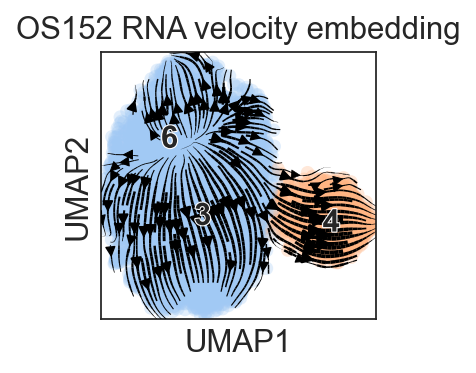

In [7]:
# computing the moments
scv.pp.moments(adata, mode = 'distances')
 

# recovering dynamics
scv.tl.recover_dynamics(adata)


# inferring the DYNAMIC velocities
scv.tl.velocity(adata, mode='dynamical')


# computing the velocity graph
scv.tl.velocity_graph(adata)


# creating a dataframe with the cluster IDs
clusters = pd.DataFrame(adata.obs['leiden'].astype('int64').values)


# Define the number of clusters
n_clusters = len(clusters[0].unique())


# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_clusters)


# Create a dictionary that maps each cluster ID to a color from the palette
cluster_colors = dict(zip(sorted(clusters[0].unique()), colors))


# Map the cluster IDs to their corresponding colors
adata.uns['ClusterName_colors'] = [cluster_colors[c] for c in clusters[0]]


# Set the plot style to 'white' to remove grid lines
sns.set_style('white')


# Plot the stream with the discrete color legend
scv.pl.velocity_embedding_stream(adata, basis='umap', 
                                 color='leiden', 
                                 palette=colors, 
                                 title = 'OS152 RNA velocity embedding',
                                 frameon = True)

saving figure to file ./figures/scvelo_velocity_embedding_stream.svg


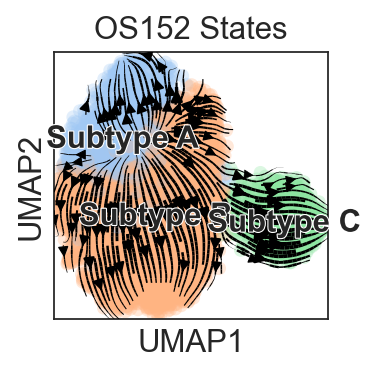

In [8]:
# Plot the stream with the discrete color legend
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap', 
                                 color='Subtype', 
                                 rasterized=True,
                                 palette=colors, 
                                 title='OS152 States',
                                 frameon=True,
                                 save='velocity_embedding_stream.svg')

# Subtype labeling

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


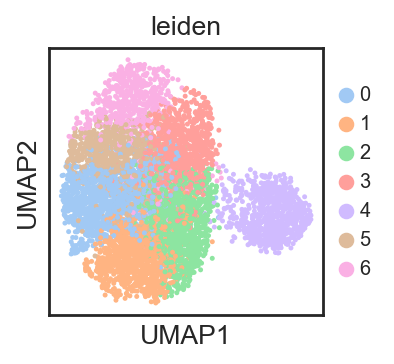

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


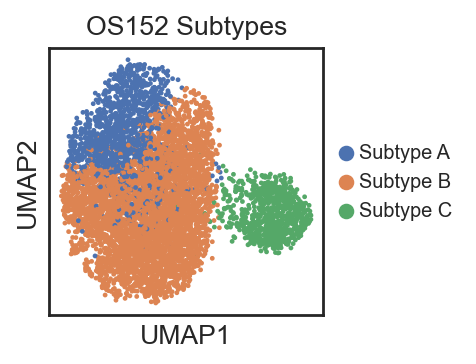

In [7]:
sc.pl.umap(adata, color=['leiden'], legend_fontsize=9, size = 20)

adata.obs['leiden'] = adata.obs['leiden'].astype('category')


adata.obs['leiden'][adata.obs['leiden']=='1']='3'
adata.obs['leiden'][adata.obs['leiden']=='0']='3'
adata.obs['leiden'][adata.obs['leiden']=='2']='3'
adata.obs['leiden'][adata.obs['leiden']=='5']='6'

# adding labels for trajectory subtype
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = { 'Subtype A': ['6'],  'Subtype B': ['3'], 'Subtype C':['4']}


# Initialize empty column in cell metadata
adata.obs['Subtype'] = np.nan


# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'Subtype'] = i

    
# Creating a dataframe with the cluster IDs
subtypes = pd.DataFrame(adata.obs['Subtype'].values)


# Define the number of clusters
n_subtypes = len(subtypes[0].unique())


# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_subtypes)


sc.pl.umap(adata, color=['Subtype'], legend_fontsize=9, title = "OS152 Subtypes") #, palette = subtype_colors


# saving the adata file with the cluster ids
adata.write("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_adata_subtype_PCA.h5ad")

#adata = sc.read("/Users/brendamelano/Desktop/OS152_adata_labeled.h5ad")


# Exporting tsv with cell barcode and subtype for MAVE

In [ ]:
def generate_tsv_from_anndata(adata, tsv_output_path, meta_col="Subtype"):
    # Use adata.obs.index for barcodes
    barcodes = adata.obs.index
    # Clean the barcodes to remove prefix and suffix and add '-1' suffix
    barcodes = barcodes.str.replace(r'^OS384:', '', regex=True).str.replace(r'x$', '', regex=True) + '-1'
    cell_types = adata.obs[meta_col]
    df = pd.DataFrame({'Barcode': barcodes, meta_col: cell_types})
    df.to_csv(tsv_output_path, sep='\t', index=False)
    print(f"TSV file saved to {tsv_output_path}")

In [10]:

    
tsv_output_path = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_10Xbarcode_subtype.tsv"
generate_tsv_from_anndata(adata, tsv_output_path)



In [12]:
tsv_output_path = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_10Xbarcode_subtype.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(tsv_output_path, sep='\t')
df

Barcode    Subtype
0     OS152:AAACGCTGTACCCGCAx  Subtype A
1     OS152:AAACCCAAGGCTCACCx  Subtype B
2     OS152:AACAAAGGTGTGTTTGx  Subtype B
3     OS152:AAAGGGCCAGTTGTCAx  Subtype B
4     OS152:AAAGGGCTCTCCAAGAx  Subtype B
...                       ...        ...
6485  OS152:TTTGATCGTTCGGGTCx  Subtype B
6486  OS152:TTTGATCTCCGCACTTx  Subtype B
6487  OS152:TTTGGTTCAACTGCCGx  Subtype B
6488  OS152:TTTGGTTGTAACACGGx  Subtype B
6489  OS152:TTTGGTTTCCGACAGCx  Subtype B

[6490 rows x 2 columns]

In [13]:
df['Barcode'] = df['Barcode'].str.replace(r'^OS152:', '', regex=True).str.replace(r'x$', '', regex=True) + '-1'



In [14]:
df

Barcode    Subtype
0     AAACGCTGTACCCGCA-1  Subtype A
1     AAACCCAAGGCTCACC-1  Subtype B
2     AACAAAGGTGTGTTTG-1  Subtype B
3     AAAGGGCCAGTTGTCA-1  Subtype B
4     AAAGGGCTCTCCAAGA-1  Subtype B
...                  ...        ...
6485  TTTGATCGTTCGGGTC-1  Subtype B
6486  TTTGATCTCCGCACTT-1  Subtype B
6487  TTTGGTTCAACTGCCG-1  Subtype B
6488  TTTGGTTGTAACACGG-1  Subtype B
6489  TTTGGTTTCCGACAGC-1  Subtype B

[6490 rows x 2 columns]

In [4]:

from argparse import ArgumentParser
import numpy as np
import os
import pandas as pd
import pysam

In [15]:
def split_bam(bamobj, dict_cells):
    dict_barcodes = {}
    for celltype in dict_cells.keys():
        print(f"Extracting {celltype} barcodes")
        barcodes = dict_cells[celltype]["barcodes"]
        for barcode in barcodes:
            dict_barcodes[barcode] = celltype
    barcodes = np.array(list(dict_barcodes.keys()))
    numreads = 0
    numaddedreads = 0
    for read in bamobj:
        cellbarcode = "0"
        for k in range(len(read.tags)):
            if read.tags[k][0] == "CB":
                cellbarcode = read.tags[k][1]
        if cellbarcode != "0":
            barcode_exists = cellbarcode in barcodes
            good_qual = read.mapq > 10
            if barcode_exists and good_qual:
                celltype = dict_barcodes[cellbarcode]
                dict_cells[celltype]["bamobj"].write(read)
                numaddedreads += 1
        if numreads % 500000 == 0:
            print(f"{numreads} reads analyzed, {numaddedreads} added")
        numreads += 1

def main(bampath, outdir, barcodepath, meta_col, samplename):
    bamobj = pysam.AlignmentFile(bampath, "rb")
    metadf = pd.read_csv(barcodepath, sep="\t")
    metadf = metadf[metadf[meta_col] == samplename]
    adname = samplename.replace(" ", "_")
    outpath = os.path.join(outdir, f"{adname}.bam")
    adobj = pysam.AlignmentFile(outpath, "wb", template=bamobj)
    dict_cells = {
        samplename: {
            "barcodes": np.array(metadf["Barcode"]),
            "bampath": outpath,
            "bamobj": adobj}}
    split_bam(bamobj, dict_cells)
    for celltype in pd.unique(metadf[meta_col]):
        dict_cells[celltype]["bamobj"].close()
    bamobj.close()

In [17]:
BAMPATH = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/possorted_genome_bam.bam"#"~/plain_osteo_scRNAseq/os_pdx/OS152/outs/possorted_genome_bam.bam"
OUTDIR = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/"#"~/plain_osteo_scRNAseq/os_pdx/OS152/outs"
BARCODEPATH = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_10Xbarcode_subtype.tsv"#"~/plain_osteo_scRNAseq/os_pdx/OS152/outs/OS152_10Xbarcode_subtype.tsv"
Subtypes = ["Subtype A", "Subtype B", "Subtype C"]


In [18]:



for CELLTYPE in Subtypes:
    main(BAMPATH, OUTDIR, BARCODEPATH, "Subtype", CELLTYPE)
    

Extracting Subtype A barcodes
0 reads analyzed, 0 added
100000 reads analyzed, 9811 added
200000 reads analyzed, 24323 added
300000 reads analyzed, 38329 added
400000 reads analyzed, 51895 added
500000 reads analyzed, 66903 added
600000 reads analyzed, 81507 added
700000 reads analyzed, 95897 added
800000 reads analyzed, 110646 added
900000 reads analyzed, 125618 added
1000000 reads analyzed, 140587 added
1100000 reads analyzed, 155741 added
1200000 reads analyzed, 170149 added
1300000 reads analyzed, 184700 added
1400000 reads analyzed, 199220 added
1500000 reads analyzed, 213847 added
1600000 reads analyzed, 229394 added
1700000 reads analyzed, 244849 added
1800000 reads analyzed, 258398 added
1900000 reads analyzed, 273590 added
2000000 reads analyzed, 288997 added
2100000 reads analyzed, 304800 added
2200000 reads analyzed, 320348 added
2300000 reads analyzed, 336113 added
2400000 reads analyzed, 350509 added
2500000 reads analyzed, 365009 added
2600000 reads analyzed, 378169 added

21500000 reads analyzed, 3160097 added
21600000 reads analyzed, 3175812 added
21700000 reads analyzed, 3191093 added
21800000 reads analyzed, 3206437 added
21900000 reads analyzed, 3221058 added
22000000 reads analyzed, 3236851 added
22100000 reads analyzed, 3252478 added
22200000 reads analyzed, 3268312 added
22300000 reads analyzed, 3283471 added
22400000 reads analyzed, 3298744 added
22500000 reads analyzed, 3313760 added
22600000 reads analyzed, 3326986 added
22700000 reads analyzed, 3340506 added
22800000 reads analyzed, 3353758 added
22900000 reads analyzed, 3368154 added
23000000 reads analyzed, 3381893 added
23100000 reads analyzed, 3396952 added
23200000 reads analyzed, 3412613 added
23300000 reads analyzed, 3427371 added
23400000 reads analyzed, 3441722 added
23500000 reads analyzed, 3456819 added
23600000 reads analyzed, 3471429 added
23700000 reads analyzed, 3487085 added
23800000 reads analyzed, 3502491 added
23900000 reads analyzed, 3517071 added
24000000 reads analyzed, 

42600000 reads analyzed, 6269222 added
42700000 reads analyzed, 6283820 added
42800000 reads analyzed, 6298837 added
42900000 reads analyzed, 6314276 added
43000000 reads analyzed, 6330073 added
43100000 reads analyzed, 6343571 added
43200000 reads analyzed, 6358905 added
43300000 reads analyzed, 6370657 added
43400000 reads analyzed, 6385542 added
43500000 reads analyzed, 6400574 added
43600000 reads analyzed, 6416367 added
43700000 reads analyzed, 6436885 added
43800000 reads analyzed, 6456780 added
43900000 reads analyzed, 6471308 added
44000000 reads analyzed, 6486819 added
44100000 reads analyzed, 6502543 added
44200000 reads analyzed, 6518383 added
44300000 reads analyzed, 6533623 added
44400000 reads analyzed, 6546890 added
44500000 reads analyzed, 6561765 added
44600000 reads analyzed, 6575558 added
44700000 reads analyzed, 6590406 added
44800000 reads analyzed, 6605665 added
44900000 reads analyzed, 6620899 added
45000000 reads analyzed, 6636782 added
45100000 reads analyzed, 

63700000 reads analyzed, 9440201 added
63800000 reads analyzed, 9456659 added
63900000 reads analyzed, 9471957 added
64000000 reads analyzed, 9487086 added
64100000 reads analyzed, 9501856 added
64200000 reads analyzed, 9515997 added
64300000 reads analyzed, 9530410 added
64400000 reads analyzed, 9544825 added
64500000 reads analyzed, 9559636 added
64600000 reads analyzed, 9574368 added
64700000 reads analyzed, 9589719 added
64800000 reads analyzed, 9605413 added
64900000 reads analyzed, 9619296 added
65000000 reads analyzed, 9633639 added
65100000 reads analyzed, 9648671 added
65200000 reads analyzed, 9664415 added
65300000 reads analyzed, 9679253 added
65400000 reads analyzed, 9692118 added
65500000 reads analyzed, 9707047 added
65600000 reads analyzed, 9722346 added
65700000 reads analyzed, 9736822 added
65800000 reads analyzed, 9750409 added
65900000 reads analyzed, 9765299 added
66000000 reads analyzed, 9779981 added
66100000 reads analyzed, 9795567 added
66200000 reads analyzed, 

84300000 reads analyzed, 12506131 added
84400000 reads analyzed, 12522192 added
84500000 reads analyzed, 12538947 added
84600000 reads analyzed, 12555442 added
84700000 reads analyzed, 12571191 added
84800000 reads analyzed, 12584632 added
84900000 reads analyzed, 12600098 added
85000000 reads analyzed, 12616249 added
85100000 reads analyzed, 12632583 added
85200000 reads analyzed, 12646518 added
85300000 reads analyzed, 12658513 added
85400000 reads analyzed, 12674422 added
85500000 reads analyzed, 12688482 added
85600000 reads analyzed, 12701276 added
85700000 reads analyzed, 12713164 added
85800000 reads analyzed, 12728888 added
85900000 reads analyzed, 12743010 added
86000000 reads analyzed, 12758893 added
86100000 reads analyzed, 12775372 added
86200000 reads analyzed, 12791865 added
86300000 reads analyzed, 12808165 added
86400000 reads analyzed, 12824661 added
86500000 reads analyzed, 12841222 added
86600000 reads analyzed, 12857832 added
86700000 reads analyzed, 12874381 added


104700000 reads analyzed, 15601825 added
104800000 reads analyzed, 15616250 added
104900000 reads analyzed, 15631709 added
105000000 reads analyzed, 15646631 added
105100000 reads analyzed, 15661434 added
105200000 reads analyzed, 15677707 added
105300000 reads analyzed, 15692352 added
105400000 reads analyzed, 15708379 added
105500000 reads analyzed, 15724898 added
105600000 reads analyzed, 15740669 added
105700000 reads analyzed, 15756091 added
105800000 reads analyzed, 15771835 added
105900000 reads analyzed, 15787518 added
106000000 reads analyzed, 15803651 added
106100000 reads analyzed, 15819431 added
106200000 reads analyzed, 15835546 added
106300000 reads analyzed, 15851406 added
106400000 reads analyzed, 15867354 added
106500000 reads analyzed, 15883213 added
106600000 reads analyzed, 15899088 added
106700000 reads analyzed, 15914852 added
106800000 reads analyzed, 15928865 added
106900000 reads analyzed, 15943906 added
107000000 reads analyzed, 15958796 added
107100000 reads 

5200000 reads analyzed, 3208387 added
5300000 reads analyzed, 3269761 added
5400000 reads analyzed, 3332043 added
5500000 reads analyzed, 3396848 added
5600000 reads analyzed, 3459923 added
5700000 reads analyzed, 3517868 added
5800000 reads analyzed, 3554861 added
5900000 reads analyzed, 3615199 added
6000000 reads analyzed, 3677077 added
6100000 reads analyzed, 3738663 added
6200000 reads analyzed, 3795242 added
6300000 reads analyzed, 3858270 added
6400000 reads analyzed, 3918759 added
6500000 reads analyzed, 3979790 added
6600000 reads analyzed, 4040898 added
6700000 reads analyzed, 4102519 added
6800000 reads analyzed, 4163384 added
6900000 reads analyzed, 4221302 added
7000000 reads analyzed, 4279189 added
7100000 reads analyzed, 4340059 added
7200000 reads analyzed, 4402532 added
7300000 reads analyzed, 4465331 added
7400000 reads analyzed, 4526269 added
7500000 reads analyzed, 4561914 added
7600000 reads analyzed, 4588032 added
7700000 reads analyzed, 4629042 added
7800000 read

26100000 reads analyzed, 15444822 added
26200000 reads analyzed, 15505038 added
26300000 reads analyzed, 15563649 added
26400000 reads analyzed, 15621920 added
26500000 reads analyzed, 15673555 added
26600000 reads analyzed, 15732500 added
26700000 reads analyzed, 15793865 added
26800000 reads analyzed, 15855425 added
26900000 reads analyzed, 15912653 added
27000000 reads analyzed, 15974046 added
27100000 reads analyzed, 16034279 added
27200000 reads analyzed, 16094377 added
27300000 reads analyzed, 16153456 added
27400000 reads analyzed, 16212477 added
27500000 reads analyzed, 16271740 added
27600000 reads analyzed, 16331109 added
27700000 reads analyzed, 16392014 added
27800000 reads analyzed, 16451662 added
27900000 reads analyzed, 16511626 added
28000000 reads analyzed, 16570229 added
28100000 reads analyzed, 16631639 added
28200000 reads analyzed, 16691917 added
28300000 reads analyzed, 16752464 added
28400000 reads analyzed, 16813159 added
28500000 reads analyzed, 16874510 added


46600000 reads analyzed, 27676885 added
46700000 reads analyzed, 27738875 added
46800000 reads analyzed, 27803156 added
46900000 reads analyzed, 27869692 added
47000000 reads analyzed, 27932114 added
47100000 reads analyzed, 27994565 added
47200000 reads analyzed, 28053397 added
47300000 reads analyzed, 28111261 added
47400000 reads analyzed, 28172814 added
47500000 reads analyzed, 28233002 added
47600000 reads analyzed, 28292605 added
47700000 reads analyzed, 28349150 added
47800000 reads analyzed, 28410427 added
47900000 reads analyzed, 28457644 added
48000000 reads analyzed, 28481785 added
48100000 reads analyzed, 28542498 added
48200000 reads analyzed, 28601728 added
48300000 reads analyzed, 28660922 added
48400000 reads analyzed, 28720912 added
48500000 reads analyzed, 28780766 added
48600000 reads analyzed, 28842502 added
48700000 reads analyzed, 28901840 added
48800000 reads analyzed, 28963617 added
48900000 reads analyzed, 29025687 added
49000000 reads analyzed, 29087975 added


67100000 reads analyzed, 39939812 added
67200000 reads analyzed, 39999124 added
67300000 reads analyzed, 40057145 added
67400000 reads analyzed, 40115694 added
67500000 reads analyzed, 40177350 added
67600000 reads analyzed, 40220333 added
67700000 reads analyzed, 40277391 added
67800000 reads analyzed, 40333060 added
67900000 reads analyzed, 40393807 added
68000000 reads analyzed, 40455394 added
68100000 reads analyzed, 40515742 added
68200000 reads analyzed, 40575116 added
68300000 reads analyzed, 40635547 added
68400000 reads analyzed, 40694815 added
68500000 reads analyzed, 40756118 added
68600000 reads analyzed, 40816382 added
68700000 reads analyzed, 40876308 added
68800000 reads analyzed, 40936684 added
68900000 reads analyzed, 40996906 added
69000000 reads analyzed, 41057582 added
69100000 reads analyzed, 41119683 added
69200000 reads analyzed, 41176598 added
69300000 reads analyzed, 41237781 added
69400000 reads analyzed, 41295830 added
69500000 reads analyzed, 41356312 added


87600000 reads analyzed, 52184790 added
87700000 reads analyzed, 52245250 added
87800000 reads analyzed, 52305470 added
87900000 reads analyzed, 52368361 added
88000000 reads analyzed, 52429182 added
88100000 reads analyzed, 52491473 added
88200000 reads analyzed, 52551909 added
88300000 reads analyzed, 52613212 added
88400000 reads analyzed, 52673882 added
88500000 reads analyzed, 52737381 added
88600000 reads analyzed, 52796817 added
88700000 reads analyzed, 52856473 added
88800000 reads analyzed, 52911814 added
88900000 reads analyzed, 52971671 added
89000000 reads analyzed, 53031812 added
89100000 reads analyzed, 53092466 added
89200000 reads analyzed, 53147969 added
89300000 reads analyzed, 53208803 added
89400000 reads analyzed, 53269620 added
89500000 reads analyzed, 53326622 added
89600000 reads analyzed, 53384528 added
89700000 reads analyzed, 53442525 added
89800000 reads analyzed, 53502995 added
89900000 reads analyzed, 53561936 added
90000000 reads analyzed, 53622482 added


107900000 reads analyzed, 64473727 added
108000000 reads analyzed, 64531312 added
108100000 reads analyzed, 64584611 added
108200000 reads analyzed, 64627393 added
108300000 reads analyzed, 64671973 added
108400000 reads analyzed, 64724968 added
108500000 reads analyzed, 64773548 added
108600000 reads analyzed, 64821483 added
108700000 reads analyzed, 64870447 added
108800000 reads analyzed, 64919807 added
108900000 reads analyzed, 64969511 added
109000000 reads analyzed, 65019968 added
109100000 reads analyzed, 65073749 added
109200000 reads analyzed, 65128035 added
109300000 reads analyzed, 65182853 added
109400000 reads analyzed, 65240508 added
109500000 reads analyzed, 65298168 added
109600000 reads analyzed, 65357041 added
109700000 reads analyzed, 65410401 added
109800000 reads analyzed, 65464829 added
109900000 reads analyzed, 65519308 added
110000000 reads analyzed, 65573229 added
110100000 reads analyzed, 65627498 added
110200000 reads analyzed, 65681715 added
110300000 reads 

8900000 reads analyzed, 1029949 added
9000000 reads analyzed, 1047984 added
9100000 reads analyzed, 1064112 added
9200000 reads analyzed, 1079207 added
9300000 reads analyzed, 1095203 added
9400000 reads analyzed, 1111519 added
9500000 reads analyzed, 1129049 added
9600000 reads analyzed, 1145618 added
9700000 reads analyzed, 1160323 added
9800000 reads analyzed, 1174817 added
9900000 reads analyzed, 1191500 added
10000000 reads analyzed, 1207199 added
10100000 reads analyzed, 1228232 added
10200000 reads analyzed, 1244803 added
10300000 reads analyzed, 1265727 added
10400000 reads analyzed, 1281248 added
10500000 reads analyzed, 1300354 added
10600000 reads analyzed, 1320109 added
10700000 reads analyzed, 1339123 added
10800000 reads analyzed, 1353147 added
10900000 reads analyzed, 1370595 added
11000000 reads analyzed, 1384237 added
11100000 reads analyzed, 1399211 added
11200000 reads analyzed, 1415225 added
11300000 reads analyzed, 1431971 added
11400000 reads analyzed, 1445507 add

30000000 reads analyzed, 3841706 added
30100000 reads analyzed, 3851437 added
30200000 reads analyzed, 3862496 added
30300000 reads analyzed, 3873129 added
30400000 reads analyzed, 3882256 added
30500000 reads analyzed, 3892810 added
30600000 reads analyzed, 3904499 added
30700000 reads analyzed, 3916219 added
30800000 reads analyzed, 3929264 added
30900000 reads analyzed, 3941000 added
31000000 reads analyzed, 3952079 added
31100000 reads analyzed, 3962324 added
31200000 reads analyzed, 3973596 added
31300000 reads analyzed, 3985091 added
31400000 reads analyzed, 3996848 added
31500000 reads analyzed, 4007649 added
31600000 reads analyzed, 4019463 added
31700000 reads analyzed, 4032562 added
31800000 reads analyzed, 4042961 added
31900000 reads analyzed, 4053661 added
32000000 reads analyzed, 4064882 added
32100000 reads analyzed, 4076809 added
32200000 reads analyzed, 4088364 added
32300000 reads analyzed, 4099652 added
32400000 reads analyzed, 4117213 added
32500000 reads analyzed, 

51100000 reads analyzed, 6335559 added
51200000 reads analyzed, 6350449 added
51300000 reads analyzed, 6363100 added
51400000 reads analyzed, 6375092 added
51500000 reads analyzed, 6387809 added
51600000 reads analyzed, 6400053 added
51700000 reads analyzed, 6413028 added
51800000 reads analyzed, 6426063 added
51900000 reads analyzed, 6439164 added
52000000 reads analyzed, 6451892 added
52100000 reads analyzed, 6464187 added
52200000 reads analyzed, 6476988 added
52300000 reads analyzed, 6489037 added
52400000 reads analyzed, 6500942 added
52500000 reads analyzed, 6514379 added
52600000 reads analyzed, 6523935 added
52700000 reads analyzed, 6534230 added
52800000 reads analyzed, 6545788 added
52900000 reads analyzed, 6558160 added
53000000 reads analyzed, 6568985 added
53100000 reads analyzed, 6579955 added
53200000 reads analyzed, 6592197 added
53300000 reads analyzed, 6604755 added
53400000 reads analyzed, 6617808 added
53500000 reads analyzed, 6631437 added
53600000 reads analyzed, 

72200000 reads analyzed, 8880503 added
72300000 reads analyzed, 8893857 added
72400000 reads analyzed, 8906205 added
72500000 reads analyzed, 8918531 added
72600000 reads analyzed, 8930972 added
72700000 reads analyzed, 8943027 added
72800000 reads analyzed, 8954118 added
72900000 reads analyzed, 8964686 added
73000000 reads analyzed, 8976644 added
73100000 reads analyzed, 8988866 added
73200000 reads analyzed, 8999262 added
73300000 reads analyzed, 9012188 added
73400000 reads analyzed, 9022310 added
73500000 reads analyzed, 9032919 added
73600000 reads analyzed, 9044032 added
73700000 reads analyzed, 9055589 added
73800000 reads analyzed, 9070317 added
73900000 reads analyzed, 9085135 added
74000000 reads analyzed, 9098725 added
74100000 reads analyzed, 9113695 added
74200000 reads analyzed, 9125522 added
74300000 reads analyzed, 9137983 added
74400000 reads analyzed, 9149232 added
74500000 reads analyzed, 9161462 added
74600000 reads analyzed, 9173582 added
74700000 reads analyzed, 

93000000 reads analyzed, 11274549 added
93100000 reads analyzed, 11286422 added
93200000 reads analyzed, 11298815 added
93300000 reads analyzed, 11311243 added
93400000 reads analyzed, 11321742 added
93500000 reads analyzed, 11333999 added
93600000 reads analyzed, 11346674 added
93700000 reads analyzed, 11358473 added
93800000 reads analyzed, 11371283 added
93900000 reads analyzed, 11382856 added
94000000 reads analyzed, 11395617 added
94100000 reads analyzed, 11405350 added
94200000 reads analyzed, 11418369 added
94300000 reads analyzed, 11430139 added
94400000 reads analyzed, 11441068 added
94500000 reads analyzed, 11453385 added
94600000 reads analyzed, 11466731 added
94700000 reads analyzed, 11476683 added
94800000 reads analyzed, 11487176 added
94900000 reads analyzed, 11495948 added
95000000 reads analyzed, 11509201 added
95100000 reads analyzed, 11519766 added
95200000 reads analyzed, 11530546 added
95300000 reads analyzed, 11541374 added
95400000 reads analyzed, 11554255 added


113200000 reads analyzed, 13606377 added
113300000 reads analyzed, 13618811 added
113400000 reads analyzed, 13634608 added
113500000 reads analyzed, 13650497 added
113600000 reads analyzed, 13666393 added
113700000 reads analyzed, 13682331 added
113800000 reads analyzed, 13695417 added
113900000 reads analyzed, 13709550 added
114000000 reads analyzed, 13721902 added
114100000 reads analyzed, 13733947 added
114200000 reads analyzed, 13745427 added
114300000 reads analyzed, 13758447 added
114400000 reads analyzed, 13771167 added
114500000 reads analyzed, 13785511 added
114600000 reads analyzed, 13799078 added
114700000 reads analyzed, 13811514 added
114800000 reads analyzed, 13825209 added
114900000 reads analyzed, 13837367 added
115000000 reads analyzed, 13850334 added
115100000 reads analyzed, 13859586 added
115200000 reads analyzed, 13869112 added
115300000 reads analyzed, 13879041 added
115400000 reads analyzed, 13891595 added
115500000 reads analyzed, 13903603 added
115600000 reads 

# scVI

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/400:   0%|                                      | 0/400 [00:00<?, ?it/s]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 2/400:   0%|           | 1/400 [00:01<07:02,  1.06s/it, loss=729, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/400:   0%|           | 2/400 [00:01<06:32,  1.02it/s, loss=677, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 3/400:   0%|           | 2/400 [00:01<06:32,  1.02it/s, loss=677, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 4/400:   1%|           | 3/400 [00:02<06:30,  1.02it/s, loss=660, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/400:   1%|           | 4/400 [00:03<06:22,  1.04it/s, loss=650, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 6/400:   1%|▏          | 5/400 [00:04<06:18,  1.04it/s, loss=641, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/400:   2%|▏          | 6/400 [00:05<06:13,  1.06it/s, loss=637, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 8/400:   2%|▏          | 7/400 [00:06<06:10,  1.06it/s, loss=635, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 9/400:   2%|▏          | 8/400 [00:07<06:06,  1.07it/s, loss=629, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 10/400:   2%|▏         | 9/400 [00:08<06:11,  1.05it/s, loss=627, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 11/400:   2%|▏        | 10/400 [00:09<06:10,  1.05it/s, loss=625, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 11/400:   3%|▏        | 11/400 [00:10<06:09,  1.05it/s, loss=622, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 12/400:   3%|▏        | 11/400 [00:10<06:09,  1.05it/s, loss=622, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 13/400:   3%|▎        | 12/400 [00:11<06:07,  1.06it/s, loss=618, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 14/400:   3%|▎        | 13/400 [00:12<06:06,  1.05it/s, loss=618, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 15/400:   4%|▎        | 14/400 [00:13<06:07,  1.05it/s, loss=614, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 16/400:   4%|▎        | 15/400 [00:14<06:06,  1.05it/s, loss=614, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 17/400:   4%|▎        | 16/400 [00:15<06:04,  1.05it/s, loss=611, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 17/400:   4%|▍        | 17/400 [00:16<06:03,  1.05it/s, loss=608, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 18/400:   4%|▍        | 17/400 [00:16<06:03,  1.05it/s, loss=608, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 19/400:   4%|▍        | 18/400 [00:17<06:04,  1.05it/s, loss=609, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 20/400:   5%|▍        | 19/400 [00:18<06:02,  1.05it/s, loss=607, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 21/400:   5%|▍        | 20/400 [00:19<06:00,  1.05it/s, loss=606, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 22/400:   5%|▍        | 21/400 [00:20<05:59,  1.06it/s, loss=602, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 23/400:   6%|▍        | 22/400 [00:20<05:57,  1.06it/s, loss=603, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 24/400:   6%|▌        | 23/400 [00:21<05:57,  1.05it/s, loss=598, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 25/400:   6%|▌        | 24/400 [00:22<05:57,  1.05it/s, loss=599, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 26/400:   6%|▌        | 25/400 [00:23<05:55,  1.05it/s, loss=597, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 27/400:   6%|▌        | 26/400 [00:24<05:53,  1.06it/s, loss=597, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 28/400:   7%|▌        | 27/400 [00:25<05:53,  1.06it/s, loss=594, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 29/400:   7%|▋        | 28/400 [00:26<05:51,  1.06it/s, loss=594, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 30/400:   7%|▋        | 29/400 [00:27<05:56,  1.04it/s, loss=592, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 31/400:   8%|▋        | 30/400 [00:28<05:55,  1.04it/s, loss=591, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 32/400:   8%|▋        | 31/400 [00:29<05:55,  1.04it/s, loss=591, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 33/400:   8%|▋        | 32/400 [00:30<05:52,  1.04it/s, loss=590, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 34/400:   8%|▋        | 33/400 [00:31<05:51,  1.05it/s, loss=589, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 35/400:   8%|▊        | 34/400 [00:32<05:47,  1.05it/s, loss=589, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 36/400:   9%|▊        | 35/400 [00:33<06:03,  1.00it/s, loss=588, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 36/400:   9%|▊        | 36/400 [00:34<06:06,  1.01s/it, loss=588, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 37/400:   9%|▊        | 36/400 [00:34<06:06,  1.01s/it, loss=586, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 38/400:   9%|▊        | 37/400 [00:35<05:53,  1.03it/s, loss=585, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 39/400:  10%|▊        | 38/400 [00:36<05:44,  1.05it/s, loss=585, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 40/400:  10%|▉        | 39/400 [00:37<05:37,  1.07it/s, loss=582, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 41/400:  10%|▉        | 40/400 [00:38<05:33,  1.08it/s, loss=583, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 41/400:  10%|▉        | 41/400 [00:39<05:28,  1.09it/s, loss=583, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 42/400:  10%|▉        | 41/400 [00:39<05:28,  1.09it/s, loss=581, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 43/400:  10%|▉        | 42/400 [00:39<05:26,  1.10it/s, loss=582, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 44/400:  11%|▉        | 43/400 [00:40<05:26,  1.09it/s, loss=580, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 45/400:  11%|▉        | 44/400 [00:41<05:30,  1.08it/s, loss=581, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 46/400:  11%|█        | 45/400 [00:42<05:29,  1.08it/s, loss=580, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 47/400:  12%|█        | 46/400 [00:43<05:31,  1.07it/s, loss=579, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 48/400:  12%|█        | 47/400 [00:44<05:33,  1.06it/s, loss=578, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 49/400:  12%|█        | 48/400 [00:45<05:33,  1.06it/s, loss=577, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 50/400:  12%|█        | 49/400 [00:46<05:31,  1.06it/s, loss=578, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 51/400:  12%|█▏       | 50/400 [00:47<05:29,  1.06it/s, loss=576, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 52/400:  13%|█▏       | 51/400 [00:48<05:28,  1.06it/s, loss=576, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 53/400:  13%|█▏       | 52/400 [00:49<05:26,  1.07it/s, loss=575, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 54/400:  13%|█▏       | 53/400 [00:50<05:24,  1.07it/s, loss=575, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 55/400:  14%|█▏       | 54/400 [00:51<05:24,  1.07it/s, loss=576, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 56/400:  14%|█▏       | 55/400 [00:52<05:22,  1.07it/s, loss=573, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 57/400:  14%|█▎       | 56/400 [00:53<05:21,  1.07it/s, loss=574, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 58/400:  14%|█▎       | 57/400 [00:54<05:20,  1.07it/s, loss=573, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 59/400:  14%|█▎       | 58/400 [00:54<05:19,  1.07it/s, loss=572, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 60/400:  15%|█▎       | 59/400 [00:55<05:17,  1.07it/s, loss=571, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 61/400:  15%|█▎       | 60/400 [00:56<05:16,  1.07it/s, loss=572, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 62/400:  15%|█▎       | 61/400 [00:57<05:16,  1.07it/s, loss=572, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 63/400:  16%|█▍       | 62/400 [00:58<05:16,  1.07it/s, loss=573, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 64/400:  16%|█▍       | 63/400 [00:59<05:15,  1.07it/s, loss=571, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 65/400:  16%|█▍       | 64/400 [01:00<05:14,  1.07it/s, loss=571, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 66/400:  16%|█▍       | 65/400 [01:01<05:13,  1.07it/s, loss=570, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 67/400:  16%|█▍       | 66/400 [01:02<05:11,  1.07it/s, loss=569, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 68/400:  17%|█▌       | 67/400 [01:03<05:10,  1.07it/s, loss=569, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 69/400:  17%|█▌       | 68/400 [01:04<05:09,  1.07it/s, loss=569, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 70/400:  17%|█▌       | 69/400 [01:05<05:08,  1.07it/s, loss=569, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 71/400:  18%|█▌       | 70/400 [01:06<05:08,  1.07it/s, loss=568, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 72/400:  18%|█▌       | 71/400 [01:07<05:07,  1.07it/s, loss=567, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 73/400:  18%|█▌       | 72/400 [01:08<05:06,  1.07it/s, loss=568, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 74/400:  18%|█▋       | 73/400 [01:08<05:06,  1.07it/s, loss=567, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 75/400:  18%|█▋       | 74/400 [01:09<05:06,  1.07it/s, loss=567, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 76/400:  19%|█▋       | 75/400 [01:10<05:04,  1.07it/s, loss=566, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 77/400:  19%|█▋       | 76/400 [01:11<05:03,  1.07it/s, loss=567, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 78/400:  19%|█▋       | 77/400 [01:12<05:01,  1.07it/s, loss=567, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 79/400:  20%|█▊       | 78/400 [01:13<05:01,  1.07it/s, loss=566, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 80/400:  20%|█▊       | 79/400 [01:14<04:59,  1.07it/s, loss=565, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 81/400:  20%|█▊       | 80/400 [01:15<04:59,  1.07it/s, loss=564, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 82/400:  20%|█▊       | 81/400 [01:16<04:57,  1.07it/s, loss=565, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 83/400:  20%|█▊       | 82/400 [01:17<04:56,  1.07it/s, loss=565, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 84/400:  21%|█▊       | 83/400 [01:18<04:54,  1.08it/s, loss=565, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 85/400:  21%|█▉       | 84/400 [01:19<04:53,  1.08it/s, loss=565, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 86/400:  21%|█▉       | 85/400 [01:20<04:52,  1.08it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 87/400:  22%|█▉       | 86/400 [01:21<04:50,  1.08it/s, loss=564, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 88/400:  22%|█▉       | 87/400 [01:22<04:50,  1.08it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 89/400:  22%|█▉       | 88/400 [01:22<04:49,  1.08it/s, loss=564, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 90/400:  22%|██       | 89/400 [01:23<04:47,  1.08it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 91/400:  22%|██       | 90/400 [01:24<04:46,  1.08it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 92/400:  23%|██       | 91/400 [01:25<04:46,  1.08it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 93/400:  23%|██       | 92/400 [01:26<04:45,  1.08it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 94/400:  23%|██       | 93/400 [01:27<04:46,  1.07it/s, loss=564, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 95/400:  24%|██       | 94/400 [01:28<04:46,  1.07it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 96/400:  24%|██▏      | 95/400 [01:29<04:45,  1.07it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 97/400:  24%|██▏      | 96/400 [01:30<04:45,  1.07it/s, loss=563, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 98/400:  24%|██▏      | 97/400 [01:31<04:43,  1.07it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 99/400:  24%|██▏      | 98/400 [01:32<04:41,  1.07it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 100/400:  25%|█▉      | 99/400 [01:33<04:43,  1.06it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 101/400:  25%|█▊     | 100/400 [01:34<04:41,  1.06it/s, loss=561, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 102/400:  25%|█▊     | 101/400 [01:35<04:40,  1.07it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 103/400:  26%|█▊     | 102/400 [01:36<04:38,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 104/400:  26%|█▊     | 103/400 [01:36<04:36,  1.07it/s, loss=562, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 105/400:  26%|█▊     | 104/400 [01:37<04:38,  1.06it/s, loss=561, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 106/400:  26%|█▊     | 105/400 [01:38<04:37,  1.06it/s, loss=561, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 107/400:  26%|█▊     | 106/400 [01:39<04:34,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 108/400:  27%|█▊     | 107/400 [01:40<04:33,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 109/400:  27%|█▉     | 108/400 [01:41<04:32,  1.07it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 110/400:  27%|█▉     | 109/400 [01:42<04:31,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 111/400:  28%|█▉     | 110/400 [01:43<04:39,  1.04it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 112/400:  28%|█▉     | 111/400 [01:44<04:35,  1.05it/s, loss=561, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 113/400:  28%|█▉     | 112/400 [01:45<04:32,  1.06it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 114/400:  28%|█▉     | 113/400 [01:46<04:30,  1.06it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 115/400:  28%|█▉     | 114/400 [01:47<04:28,  1.07it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 116/400:  29%|██     | 115/400 [01:48<04:30,  1.05it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 117/400:  29%|██     | 116/400 [01:49<04:28,  1.06it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 118/400:  29%|██     | 117/400 [01:50<04:25,  1.06it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 119/400:  30%|██     | 118/400 [01:51<04:23,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 120/400:  30%|██     | 119/400 [01:52<04:22,  1.07it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 121/400:  30%|██     | 120/400 [01:52<04:22,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 122/400:  30%|██     | 121/400 [01:53<04:21,  1.07it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 123/400:  30%|██▏    | 122/400 [01:54<04:21,  1.06it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 124/400:  31%|██▏    | 123/400 [01:55<04:22,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 125/400:  31%|██▏    | 124/400 [01:56<04:19,  1.06it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 126/400:  31%|██▏    | 125/400 [01:57<04:17,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 127/400:  32%|██▏    | 126/400 [01:58<04:18,  1.06it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 128/400:  32%|██▏    | 127/400 [01:59<04:16,  1.06it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 129/400:  32%|██▏    | 128/400 [02:00<04:14,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 130/400:  32%|██▎    | 129/400 [02:01<04:12,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 131/400:  32%|██▎    | 130/400 [02:02<04:11,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 132/400:  33%|██▎    | 131/400 [02:03<04:09,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 133/400:  33%|██▎    | 132/400 [02:04<04:09,  1.07it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 134/400:  33%|██▎    | 133/400 [02:05<04:08,  1.08it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 135/400:  34%|██▎    | 134/400 [02:06<04:07,  1.08it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 136/400:  34%|██▎    | 135/400 [02:06<04:06,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 137/400:  34%|██▍    | 136/400 [02:07<04:04,  1.08it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 138/400:  34%|██▍    | 137/400 [02:08<04:03,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 139/400:  34%|██▍    | 138/400 [02:09<04:01,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 140/400:  35%|██▍    | 139/400 [02:10<04:00,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 141/400:  35%|██▍    | 140/400 [02:11<03:59,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 142/400:  35%|██▍    | 141/400 [02:12<03:57,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 143/400:  36%|██▍    | 142/400 [02:13<03:57,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 144/400:  36%|██▌    | 143/400 [02:14<03:55,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 145/400:  36%|██▌    | 144/400 [02:15<03:55,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 146/400:  36%|██▌    | 145/400 [02:16<03:54,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 147/400:  36%|██▌    | 146/400 [02:17<03:53,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 148/400:  37%|██▌    | 147/400 [02:18<04:00,  1.05it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 149/400:  37%|██▌    | 148/400 [02:19<03:56,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 150/400:  37%|██▌    | 149/400 [02:19<03:54,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 151/400:  38%|██▋    | 150/400 [02:20<03:53,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 152/400:  38%|██▋    | 151/400 [02:21<03:49,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 153/400:  38%|██▋    | 152/400 [02:22<03:48,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 154/400:  38%|██▋    | 153/400 [02:23<03:46,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 155/400:  38%|██▋    | 154/400 [02:24<03:44,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 156/400:  39%|██▋    | 155/400 [02:25<03:42,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 157/400:  39%|██▋    | 156/400 [02:26<03:43,  1.09it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 158/400:  39%|██▋    | 157/400 [02:27<03:43,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 159/400:  40%|██▊    | 158/400 [02:28<03:44,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 160/400:  40%|██▊    | 159/400 [02:29<03:44,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 161/400:  40%|██▊    | 160/400 [02:30<03:43,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 162/400:  40%|██▊    | 161/400 [02:30<03:41,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 163/400:  40%|██▊    | 162/400 [02:31<03:41,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 164/400:  41%|██▊    | 163/400 [02:32<03:40,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 165/400:  41%|██▊    | 164/400 [02:33<03:39,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 166/400:  41%|██▉    | 165/400 [02:34<03:38,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 167/400:  42%|██▉    | 166/400 [02:35<03:36,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 168/400:  42%|██▉    | 167/400 [02:36<03:35,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 169/400:  42%|██▉    | 168/400 [02:37<03:34,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 170/400:  42%|██▉    | 169/400 [02:38<03:33,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 171/400:  42%|██▉    | 170/400 [02:39<03:33,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 172/400:  43%|██▉    | 171/400 [02:40<03:32,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 173/400:  43%|███    | 172/400 [02:41<03:30,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 174/400:  43%|███    | 173/400 [02:42<03:29,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 175/400:  44%|███    | 174/400 [02:43<03:28,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 176/400:  44%|███    | 175/400 [02:43<03:29,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 177/400:  44%|███    | 176/400 [02:44<03:30,  1.06it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 178/400:  44%|███    | 177/400 [02:45<03:30,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 179/400:  44%|███    | 178/400 [02:46<03:28,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 180/400:  45%|███▏   | 179/400 [02:47<03:26,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 181/400:  45%|███▏   | 180/400 [02:48<03:24,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 182/400:  45%|███▏   | 181/400 [02:49<03:23,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 183/400:  46%|███▏   | 182/400 [02:50<03:21,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 184/400:  46%|███▏   | 183/400 [02:51<03:20,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 185/400:  46%|███▏   | 184/400 [02:52<03:19,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 186/400:  46%|███▏   | 185/400 [02:53<03:18,  1.08it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 187/400:  46%|███▎   | 186/400 [02:54<03:21,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 188/400:  47%|███▎   | 187/400 [02:55<03:19,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 189/400:  47%|███▎   | 188/400 [02:56<03:17,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 190/400:  47%|███▎   | 189/400 [02:57<03:15,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 191/400:  48%|███▎   | 190/400 [02:57<03:14,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 192/400:  48%|███▎   | 191/400 [02:58<03:12,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 193/400:  48%|███▎   | 192/400 [02:59<03:11,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 194/400:  48%|███▍   | 193/400 [03:00<03:10,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 195/400:  48%|███▍   | 194/400 [03:01<03:09,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 196/400:  49%|███▍   | 195/400 [03:02<03:08,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 197/400:  49%|███▍   | 196/400 [03:03<03:08,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 198/400:  49%|███▍   | 197/400 [03:04<03:08,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 199/400:  50%|███▍   | 198/400 [03:05<03:08,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 200/400:  50%|███▍   | 199/400 [03:06<03:07,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 201/400:  50%|███▌   | 200/400 [03:07<03:06,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 202/400:  50%|███▌   | 201/400 [03:08<03:05,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 203/400:  50%|███▌   | 202/400 [03:09<03:03,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 204/400:  51%|███▌   | 203/400 [03:09<03:02,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 205/400:  51%|███▌   | 204/400 [03:10<03:02,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 206/400:  51%|███▌   | 205/400 [03:11<03:00,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 207/400:  52%|███▌   | 206/400 [03:12<02:59,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 208/400:  52%|███▌   | 207/400 [03:13<02:59,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 209/400:  52%|███▋   | 208/400 [03:14<02:57,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 210/400:  52%|███▋   | 209/400 [03:15<02:56,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 211/400:  52%|███▋   | 210/400 [03:16<02:54,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 212/400:  53%|███▋   | 211/400 [03:17<02:53,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 213/400:  53%|███▋   | 212/400 [03:18<02:51,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 214/400:  53%|███▋   | 213/400 [03:19<02:50,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 215/400:  54%|███▋   | 214/400 [03:20<02:49,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 216/400:  54%|███▊   | 215/400 [03:20<02:48,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 217/400:  54%|███▊   | 216/400 [03:21<02:48,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 218/400:  54%|███▊   | 217/400 [03:22<02:47,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 219/400:  55%|███▊   | 218/400 [03:23<02:47,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 220/400:  55%|███▊   | 219/400 [03:24<02:46,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 221/400:  55%|███▊   | 220/400 [03:25<02:45,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 222/400:  55%|███▊   | 221/400 [03:26<02:44,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 223/400:  56%|███▉   | 222/400 [03:27<02:46,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 224/400:  56%|███▉   | 223/400 [03:28<02:44,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 225/400:  56%|███▉   | 224/400 [03:29<02:42,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 226/400:  56%|███▉   | 225/400 [03:30<02:43,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 227/400:  56%|███▉   | 226/400 [03:31<02:42,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 228/400:  57%|███▉   | 227/400 [03:32<02:40,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 229/400:  57%|███▉   | 228/400 [03:33<02:39,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 230/400:  57%|████   | 229/400 [03:34<02:40,  1.07it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 231/400:  57%|████   | 230/400 [03:34<02:40,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 232/400:  58%|████   | 231/400 [03:35<02:37,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 233/400:  58%|████   | 232/400 [03:36<02:36,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 234/400:  58%|████   | 233/400 [03:37<02:34,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 235/400:  58%|████   | 234/400 [03:38<02:32,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 236/400:  59%|████   | 235/400 [03:39<02:31,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 237/400:  59%|████▏  | 236/400 [03:40<02:30,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 238/400:  59%|████▏  | 237/400 [03:41<02:31,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 239/400:  60%|████▏  | 238/400 [03:42<02:29,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 240/400:  60%|████▏  | 239/400 [03:43<02:28,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 241/400:  60%|████▏  | 240/400 [03:44<02:27,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 242/400:  60%|████▏  | 241/400 [03:45<02:27,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 243/400:  60%|████▏  | 242/400 [03:46<02:25,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 244/400:  61%|████▎  | 243/400 [03:46<02:24,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 245/400:  61%|████▎  | 244/400 [03:47<02:25,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 246/400:  61%|████▎  | 245/400 [03:48<02:23,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 247/400:  62%|████▎  | 246/400 [03:49<02:22,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 248/400:  62%|████▎  | 247/400 [03:50<02:20,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 249/400:  62%|████▎  | 248/400 [03:51<02:20,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 250/400:  62%|████▎  | 249/400 [03:52<02:18,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 251/400:  62%|████▍  | 250/400 [03:53<02:17,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 252/400:  63%|████▍  | 251/400 [03:54<02:16,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 253/400:  63%|████▍  | 252/400 [03:55<02:16,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 254/400:  63%|████▍  | 253/400 [03:56<02:20,  1.04it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 255/400:  64%|████▍  | 254/400 [03:57<02:17,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 256/400:  64%|████▍  | 255/400 [03:58<02:13,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 257/400:  64%|████▍  | 256/400 [03:58<02:12,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 258/400:  64%|████▍  | 257/400 [03:59<02:12,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 259/400:  64%|████▌  | 258/400 [04:00<02:11,  1.08it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 260/400:  65%|████▌  | 259/400 [04:01<02:10,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 261/400:  65%|████▌  | 260/400 [04:02<02:09,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 262/400:  65%|████▌  | 261/400 [04:03<02:08,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 263/400:  66%|████▌  | 262/400 [04:04<02:06,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 264/400:  66%|████▌  | 263/400 [04:05<02:05,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 265/400:  66%|████▌  | 264/400 [04:06<02:05,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 266/400:  66%|████▋  | 265/400 [04:07<02:03,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 267/400:  66%|████▋  | 266/400 [04:08<02:02,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 268/400:  67%|████▋  | 267/400 [04:09<02:01,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 269/400:  67%|████▋  | 268/400 [04:09<02:00,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 270/400:  67%|████▋  | 269/400 [04:10<02:00,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 271/400:  68%|████▋  | 270/400 [04:11<01:58,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 272/400:  68%|████▋  | 271/400 [04:12<01:57,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 273/400:  68%|████▊  | 272/400 [04:13<01:56,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 274/400:  68%|████▊  | 273/400 [04:14<01:55,  1.10it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 275/400:  68%|████▊  | 274/400 [04:15<01:55,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 276/400:  69%|████▊  | 275/400 [04:16<01:54,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 277/400:  69%|████▊  | 276/400 [04:17<01:53,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 278/400:  69%|████▊  | 277/400 [04:18<01:52,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 279/400:  70%|████▊  | 278/400 [04:19<01:51,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 280/400:  70%|████▉  | 279/400 [04:20<01:50,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 281/400:  70%|████▉  | 280/400 [04:20<01:49,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 282/400:  70%|████▉  | 281/400 [04:21<01:48,  1.10it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 283/400:  70%|████▉  | 282/400 [04:22<01:47,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 284/400:  71%|████▉  | 283/400 [04:23<01:46,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 285/400:  71%|████▉  | 284/400 [04:24<01:45,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 286/400:  71%|████▉  | 285/400 [04:25<01:44,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 287/400:  72%|█████  | 286/400 [04:26<01:44,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 288/400:  72%|█████  | 287/400 [04:27<01:43,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 289/400:  72%|█████  | 288/400 [04:28<01:43,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 290/400:  72%|█████  | 289/400 [04:29<01:41,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 291/400:  72%|█████  | 290/400 [04:30<01:40,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 292/400:  73%|█████  | 291/400 [04:30<01:39,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 293/400:  73%|█████  | 292/400 [04:31<01:38,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 294/400:  73%|█████▏ | 293/400 [04:32<01:37,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 295/400:  74%|█████▏ | 294/400 [04:33<01:39,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 296/400:  74%|█████▏ | 295/400 [04:34<01:38,  1.06it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 297/400:  74%|█████▏ | 296/400 [04:35<01:37,  1.06it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 298/400:  74%|█████▏ | 297/400 [04:36<01:36,  1.07it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 299/400:  74%|█████▏ | 298/400 [04:37<01:34,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 300/400:  75%|█████▏ | 299/400 [04:38<01:33,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 301/400:  75%|█████▎ | 300/400 [04:39<01:32,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 302/400:  75%|█████▎ | 301/400 [04:40<01:31,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 303/400:  76%|█████▎ | 302/400 [04:41<01:30,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 304/400:  76%|█████▎ | 303/400 [04:42<01:29,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 305/400:  76%|█████▎ | 304/400 [04:43<01:27,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 306/400:  76%|█████▎ | 305/400 [04:43<01:27,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 307/400:  76%|█████▎ | 306/400 [04:44<01:28,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 308/400:  77%|█████▎ | 307/400 [04:45<01:27,  1.06it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 309/400:  77%|█████▍ | 308/400 [04:46<01:26,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 310/400:  77%|█████▍ | 309/400 [04:47<01:25,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 311/400:  78%|█████▍ | 310/400 [04:48<01:23,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 312/400:  78%|█████▍ | 311/400 [04:49<01:22,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 313/400:  78%|█████▍ | 312/400 [04:50<01:23,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 314/400:  78%|█████▍ | 313/400 [04:51<01:21,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 315/400:  78%|█████▍ | 314/400 [04:52<01:21,  1.05it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 316/400:  79%|█████▌ | 315/400 [04:53<01:20,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 317/400:  79%|█████▌ | 316/400 [04:54<01:19,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 318/400:  79%|█████▌ | 317/400 [04:55<01:22,  1.01it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 319/400:  80%|█████▌ | 318/400 [04:56<01:22,  1.01s/it, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 320/400:  80%|█████▌ | 319/400 [04:57<01:21,  1.00s/it, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 321/400:  80%|█████▌ | 320/400 [04:58<01:17,  1.04it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 322/400:  80%|█████▌ | 321/400 [04:59<01:15,  1.05it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 322/400:  80%|█████▋ | 322/400 [05:00<01:14,  1.05it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 323/400:  80%|█████▋ | 322/400 [05:00<01:14,  1.05it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 324/400:  81%|█████▋ | 323/400 [05:01<01:12,  1.06it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 325/400:  81%|█████▋ | 324/400 [05:02<01:10,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 326/400:  81%|█████▋ | 325/400 [05:02<01:09,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 327/400:  82%|█████▋ | 326/400 [05:03<01:07,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 328/400:  82%|█████▋ | 327/400 [05:04<01:06,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 329/400:  82%|█████▋ | 328/400 [05:05<01:05,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 330/400:  82%|█████▊ | 329/400 [05:06<01:03,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 331/400:  82%|█████▊ | 330/400 [05:07<01:04,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 332/400:  83%|█████▊ | 331/400 [05:08<01:03,  1.09it/s, loss=555, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 333/400:  83%|█████▊ | 332/400 [05:09<01:03,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 334/400:  83%|█████▊ | 333/400 [05:10<01:02,  1.07it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 335/400:  84%|█████▊ | 334/400 [05:11<01:01,  1.08it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 336/400:  84%|█████▊ | 335/400 [05:12<01:00,  1.08it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 337/400:  84%|█████▉ | 336/400 [05:13<00:58,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 338/400:  84%|█████▉ | 337/400 [05:14<00:58,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 339/400:  84%|█████▉ | 338/400 [05:14<00:56,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 340/400:  85%|█████▉ | 339/400 [05:15<00:55,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 341/400:  85%|█████▉ | 340/400 [05:16<00:54,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 342/400:  85%|█████▉ | 341/400 [05:17<00:53,  1.10it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 343/400:  86%|█████▉ | 342/400 [05:18<00:52,  1.10it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 344/400:  86%|██████ | 343/400 [05:19<00:51,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 345/400:  86%|██████ | 344/400 [05:20<00:50,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 346/400:  86%|██████ | 345/400 [05:21<00:50,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 347/400:  86%|██████ | 346/400 [05:22<00:48,  1.11it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 348/400:  87%|██████ | 347/400 [05:23<00:47,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 349/400:  87%|██████ | 348/400 [05:23<00:46,  1.11it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 350/400:  87%|██████ | 349/400 [05:24<00:46,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 351/400:  88%|██████▏| 350/400 [05:25<00:45,  1.10it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 352/400:  88%|██████▏| 351/400 [05:26<00:45,  1.09it/s, loss=556, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 353/400:  88%|██████▏| 352/400 [05:27<00:45,  1.05it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 354/400:  88%|██████▏| 353/400 [05:28<00:45,  1.03it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 354/400:  88%|██████▏| 354/400 [05:29<00:44,  1.04it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 355/400:  88%|██████▏| 354/400 [05:29<00:44,  1.04it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 356/400:  89%|██████▏| 355/400 [05:30<00:42,  1.06it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 357/400:  89%|██████▏| 356/400 [05:31<00:40,  1.08it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 358/400:  89%|██████▏| 357/400 [05:32<00:39,  1.09it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 359/400:  90%|██████▎| 358/400 [05:33<00:38,  1.09it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 360/400:  90%|██████▎| 359/400 [05:34<00:37,  1.10it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 361/400:  90%|██████▎| 360/400 [05:35<00:36,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 362/400:  90%|██████▎| 361/400 [05:35<00:34,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 363/400:  90%|██████▎| 362/400 [05:36<00:33,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 364/400:  91%|██████▎| 363/400 [05:37<00:32,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 365/400:  91%|██████▎| 364/400 [05:38<00:31,  1.13it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 366/400:  91%|██████▍| 365/400 [05:39<00:30,  1.14it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 367/400:  92%|██████▍| 366/400 [05:40<00:30,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 368/400:  92%|██████▍| 367/400 [05:41<00:29,  1.13it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 368/400:  92%|██████▍| 368/400 [05:42<00:28,  1.13it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 369/400:  92%|██████▍| 368/400 [05:42<00:28,  1.13it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 370/400:  92%|██████▍| 369/400 [05:43<00:27,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 371/400:  92%|██████▍| 370/400 [05:43<00:26,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 372/400:  93%|██████▍| 371/400 [05:44<00:25,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 373/400:  93%|██████▌| 372/400 [05:45<00:24,  1.13it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 374/400:  93%|██████▌| 373/400 [05:46<00:23,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 375/400:  94%|██████▌| 374/400 [05:47<00:22,  1.13it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 376/400:  94%|██████▌| 375/400 [05:48<00:22,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 377/400:  94%|██████▌| 376/400 [05:49<00:21,  1.13it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 378/400:  94%|██████▌| 377/400 [05:50<00:20,  1.14it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 379/400:  94%|██████▌| 378/400 [05:50<00:19,  1.14it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 380/400:  95%|██████▋| 379/400 [05:51<00:18,  1.14it/s, loss=560, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 381/400:  95%|██████▋| 380/400 [05:52<00:17,  1.12it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 382/400:  95%|██████▋| 381/400 [05:53<00:16,  1.13it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 383/400:  96%|██████▋| 382/400 [05:54<00:16,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 384/400:  96%|██████▋| 383/400 [05:55<00:15,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 385/400:  96%|██████▋| 384/400 [05:56<00:14,  1.12it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 386/400:  96%|██████▋| 385/400 [05:57<00:13,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 387/400:  96%|██████▊| 386/400 [05:58<00:12,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 388/400:  97%|██████▊| 387/400 [05:59<00:11,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 389/400:  97%|██████▊| 388/400 [05:59<00:10,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 390/400:  97%|██████▊| 389/400 [06:00<00:09,  1.11it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 391/400:  98%|██████▊| 390/400 [06:01<00:08,  1.11it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 392/400:  98%|██████▊| 391/400 [06:02<00:08,  1.11it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 393/400:  98%|██████▊| 392/400 [06:03<00:07,  1.12it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 394/400:  98%|██████▉| 393/400 [06:04<00:06,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 395/400:  98%|██████▉| 394/400 [06:05<00:05,  1.11it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 396/400:  99%|██████▉| 395/400 [06:06<00:04,  1.12it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 397/400:  99%|██████▉| 396/400 [06:07<00:03,  1.12it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 398/400:  99%|██████▉| 397/400 [06:08<00:02,  1.09it/s, loss=559, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 399/400: 100%|██████▉| 398/400 [06:09<00:01,  1.06it/s, loss=558, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 400/400: 100%|██████▉| 399/400 [06:09<00:00,  1.07it/s, loss=557, v_num=1]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distributi

Epoch 400/400: 100%|███████| 400/400 [06:10<00:00,  1.09it/s, loss=558, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|███████| 400/400 [06:10<00:00,  1.08it/s, loss=558, v_num=1]
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


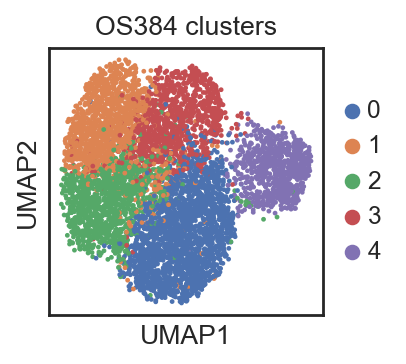

In [2]:
adata = adata.copy()


# setting up the anndata object to include categorical and continuous covariate variables
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    continuous_covariate_keys=["pct_counts_mt", "ccdifference"]
)

# creating a model for my adata object
model = scvi.model.SCVI(adata)

# inspecting the structure of the model
model

# training the model
model.train()

# reading in the adata file from the data integration script
#adata = scvi.read("/Users/brendamelano/Desktop/os_data/OS384/scvi_384_adata.h5ad")

# saving my model
#model.save("OS384_scvi_model/")

# loading the model
#model = scvi.model.SCVI.load("OS384_scvi_model/", adata, use_gpu=False)

# saving the normalized expression in a different layer 
adata.layers["scvi_normalized"] = model.get_normalized_expression(
    library_size=10e4
)

# getting the latent representation
latent = model.get_latent_representation()


# adding the latent variables to the adata object
adata.obsm["X_scVI"] = latent


# using the latent space for umap generation
sc.pp.neighbors(adata, use_rep="X_scVI")


# computing umap
sc.tl.umap(adata, min_dist=0.3)


# clustering using the leiden algorithm
# neighbors were already computed using scVI
sc.tl.leiden(adata, key_added="leiden_scVI", resolution=1)


# Set the plot style to 'white' to remove grid lines
sns.set_style('white')


# clustering using the leiden algorithm
# neighbors were already computed using scVI
sc.tl.leiden(adata, key_added="leiden_scVI", resolution=0.5)


# plotting the clusters
sc.pl.umap(
    adata,
    color=["leiden_scVI"],
    frameon=True,
    title = 'OS384 clusters'#,
    #save = "OS384_LT_umap.svg"
)


# creating a dataframe with the cluster IDs
clusters = pd.DataFrame(adata.obs['leiden_scVI'].astype('int64').values)


# Define the number of clusters
n_clusters = len(clusters[0].unique())


# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_clusters)


# Create a dictionary that maps each cluster ID to a color from the palette
cluster_colors = dict(zip(sorted(clusters[0].unique()), colors))


# Map the cluster IDs to their corresponding colors
adata.uns['ClusterName_colors'] = [cluster_colors[c] for c in clusters[0]]

# Chis-squared analysis for cell cycle

In [28]:
sc.pl.umap(
    adata,
    color=["phase"],
    frameon=True,
    title = 'OS152 Cell Cycle classification'
)

sc.pl.violin(adata, ['angiogenic_score'], groupby='Subtype', stripplot=False, inner='box', title = 'Subtype A enrichment in clusters', ylabel = 'Angiogenic Score')


# Small constant to avoid zero counts in the contingency table
epsilon = 1e-5
obs_data = adata.obs

# Create a contingency table
# Rows: depleted_10X status (True/False)
# Columns: Inside or outside cluster 3
contingency_table = pd.DataFrame(
    [
        [
            ((obs_data['phase'] == 'G1') & (obs_data['Subtype'] == 'Subtype A')).sum(),  # True in cluster 3
            ((obs_data['phase'] == 'G1') & (obs_data['Subtype'] != 'Subtype A')).sum(),  # True outside cluster 3
        ],
        [
            ((obs_data['phase'] != 'G1') & (obs_data['Subtype'] == 'Subtype A')).sum(),  # False in cluster 3
            ((obs_data['phase'] != 'G1') & (obs_data['Subtype'] != 'Subtype A')).sum(),  # False outside cluster 3
        ],
    ],
    index=["Phase_G1", "Phase_other"],
    columns=["Subtype A", "Other subtype"]
)

chi2, p, _, _ = chi2_contingency(contingency_table)


# If your data needs a small constant to be added to avoid issues with zeros, you can add it here
epsilon = 1e-10  # Or whatever small number is appropriate for your dataset
contingency_table += epsilon

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set a significance threshold (e.g., 0.05)
significance_threshold = 0.05

# Check if the result is significant
is_significant = p < significance_threshold

print(contingency_table)
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Significant: {'Yes' if is_significant else 'No'}")

# Assuming 'barcode_data' is your DataFrame and 'depleted_10X' and 'leiden_scVI' are columns
# Calculate the proportions
Subtype_A_G1 = obs_data[(obs_data['Subtype'] == 'Subtype A') & (obs_data['phase'] == 'G1')]
Subtype_A_all = obs_data[obs_data['Subtype'] == 'Subtype A']

Subtype_B_C_G1 = obs_data[(obs_data['Subtype'] != 'Subtype A') & (obs_data['phase'] == 'G1')]
Subtype_B_C_all = obs_data[obs_data['Subtype'] != 'Subtype A']

prop_in_Subtype_A = len(Subtype_A_G1) / len(Subtype_A_all)
prop_outside_Subtype_A = len(Subtype_B_C_G1) / len(Subtype_B_C_all)

# Data to plot
categories = ['Subtype A', 'Subtype B and C']
proportions = [prop_in_Subtype_A, prop_outside_Subtype_A]

# Create bar chart
plt.figure(figsize=(5,5))
bars = plt.bar(categories, proportions, width=0.8, color=['#aec6cf', '#ffb6c1'])  # pastel blue and pink

# Add a border around the chart
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Remove gridlines
plt.grid(False)

# Add labels and title (with p-value)
p_value = 1.410162683642539e-10
plt.ylabel('Proportion of cells in G1 state', fontsize=14)
plt.title(f'Proportion of G1 cells Within vs Outside Subtype A\n(p-value: {p_value:.2e})', fontsize=14)

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', fontsize=14)  # va: vertical alignment, percentage formatting

plt.tight_layout()
plt.show()


# scVI subtype labeling

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


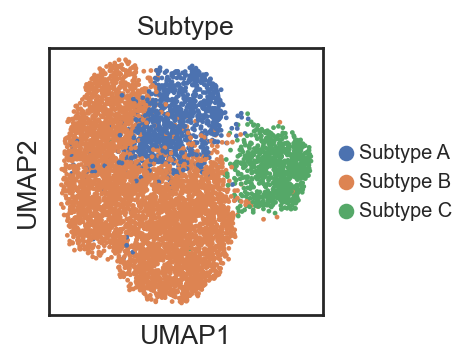

In [7]:
# Converting the cluster to category type
adata.obs['leiden_scVI'] = adata.obs['leiden_scVI'].astype('category')


adata.obs['leiden_scVI'][adata.obs['leiden_scVI']=='0']='2'
adata.obs['leiden_scVI'][adata.obs['leiden_scVI']=='1']='2'


# adding labels for trajectory subtype
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = { 'Subtype A': ['3'], 'Subtype B': ['2'], 'Subtype C': ['4']}


# Initialize empty column in cell metadata
adata.obs['subtype'] = np.nan


# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden_scVI).isin(cell_dict[i])
    adata.obs.loc[ind,'Subtype'] = i
    
    
# Plotting the subtype labeled umap
sc.pl.umap(adata, color=['Subtype'], legend_fontsize=9)


# saving the adata file with the cluster ids
adata.write("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/plain_scRNAseq_analysis/OS152/OS152_scvI_subtype.h5ad")
